In [79]:
import pandas as pd
import os.path as path

# Load the data into a pandas dataframe
bball_path = path.join(r"C:\\Users\\abbis\\Downloads\\archive (5)", 'players_stats_by_season_full_details.csv')
bball_data = pd.read_csv(bball_path)

print(bball_data.head())


  League       Season           Stage            Player Team  GP     MIN  FGM  \
0    NBA  1999 - 2000  Regular_Season  Shaquille O'Neal  LAL  79  3163.0  956   
1    NBA  1999 - 2000  Regular_Season      Vince Carter  TOR  82  3126.0  788   
2    NBA  1999 - 2000  Regular_Season       Karl Malone  UTA  82  2947.0  752   
3    NBA  1999 - 2000  Regular_Season     Allen Iverson  PHI  70  2853.0  729   
4    NBA  1999 - 2000  Regular_Season       Gary Payton  SEA  82  3425.0  747   

    FGA  3PM  ...    birth_date  height  height_cm  weight  weight_kg  \
0  1665    0  ...   Mar 6, 1972     7-1      216.0   325.0      147.0   
1  1696   95  ...  Jan 26, 1977     6-6      198.0   220.0      100.0   
2  1476    2  ...  Jul 24, 1963     6-9      206.0   265.0      120.0   
3  1733   89  ...   Jun 7, 1975     6-0      183.0   165.0       75.0   
4  1666  177  ...  Jul 23, 1968     6-4      193.0   180.0       82.0   

     nationality                  high_school  draft_round  draft_pick  \


In [80]:
from scipy import constants
from scipy import integrate
from scipy import interpolate
from scipy import linalg
from scipy import stats
import numpy as np

In [81]:
# Create a DataFrame with only the Regular Season data
regular_season_data = bball_data[bball_data['Stage'] == 'Regular_Season']
print(regular_season_data.head())

  League       Season           Stage            Player Team  GP     MIN  FGM  \
0    NBA  1999 - 2000  Regular_Season  Shaquille O'Neal  LAL  79  3163.0  956   
1    NBA  1999 - 2000  Regular_Season      Vince Carter  TOR  82  3126.0  788   
2    NBA  1999 - 2000  Regular_Season       Karl Malone  UTA  82  2947.0  752   
3    NBA  1999 - 2000  Regular_Season     Allen Iverson  PHI  70  2853.0  729   
4    NBA  1999 - 2000  Regular_Season       Gary Payton  SEA  82  3425.0  747   

    FGA  3PM  ...    birth_date  height  height_cm  weight  weight_kg  \
0  1665    0  ...   Mar 6, 1972     7-1      216.0   325.0      147.0   
1  1696   95  ...  Jan 26, 1977     6-6      198.0   220.0      100.0   
2  1476    2  ...  Jul 24, 1963     6-9      206.0   265.0      120.0   
3  1733   89  ...   Jun 7, 1975     6-0      183.0   165.0       75.0   
4  1666  177  ...  Jul 23, 1968     6-4      193.0   180.0       82.0   

     nationality                  high_school  draft_round  draft_pick  \


In [82]:
# Find the player with the most minutes in the regular season
most_minutes = regular_season_data['MIN'].max()
player_most_minutes = regular_season_data[regular_season_data['MIN'] == most_minutes]
print(player_most_minutes)

     League       Season           Stage         Player Team  GP     MIN  FGM  \
1681    NBA  2002 - 2003  Regular_Season  Allen Iverson  PHI  82  3485.0  804   

       FGA  3PM  ...   birth_date  height  height_cm  weight  weight_kg  \
1681  1940   84  ...  Jun 7, 1975     6-0      183.0   165.0       75.0   

        nationality          high_school  draft_round  draft_pick  \
1681  United States  Bethel High School           1.0         1.0   

               draft_team  
1681  Philadelphia Sixers  

[1 rows x 34 columns]


In [83]:
# Calculate 3-point accuracy percentage for each player for each regular season
regular_season_data['3P_Accuracy_Percent'] = (regular_season_data['3PM'] / regular_season_data['3PA'])*100

# Allen Iverson's 3-point accuracy for each season
AI_3p_per_season = regular_season_data.loc[regular_season_data['Player'] == 'Allen Iverson', ['Season', '3P_Accuracy_Percent']]
print(AI_3p_per_season)

           Season  3P_Accuracy_Percent
3     1999 - 2000            34.099617
506   2000 - 2001            32.026144
1025  2001 - 2002            29.104478
1681  2002 - 2003            27.722772
4108  2004 - 2005            30.769231
5324  2005 - 2006            32.286996
6553  2006 - 2007            31.472081
7942  2007 - 2008            34.545455


C:\Users\abbis\AppData\Local\Temp\ipykernel_17748\3445938513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_season_data['3P_Accuracy_Percent'] = (regular_season_data['3PM'] / regular_season_data['3PA'])*100


Slope: 0.15887762217756501
Intercept: -286.728530648299
R-squared: 0.04042003827630641
P-value: 0.6330709645325131
Standard Error: 0.3160307422223928


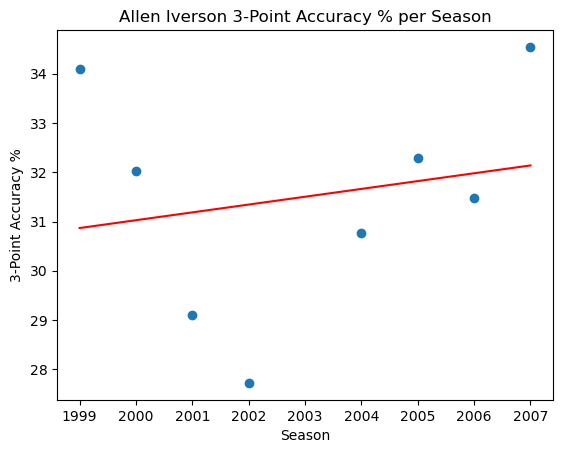

In [97]:
# Plot Allen Iverson's 3-point accuracy percentage per season
import matplotlib.pyplot as plt

# Define x and y values
# Extract the starting year from the 'Season' string and convert it to numeric values
x = pd.to_numeric(AI_3p_per_season['Season'].str.split(' - ').str[0])
y = AI_3p_per_season['3P_Accuracy_Percent']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('Slope:', slope)
print('Intercept:', intercept)
print('R-squared:', r_value**2)
print('P-value:', p_value)
print('Standard Error:', std_err)

# Plot the data and the linear regression line
plt.scatter(x, y)
plt.plot(x, slope*x + intercept, color='red')
plt.xlabel('Season')
plt.ylabel('3-Point Accuracy %')
plt.title('Allen Iverson 3-Point Accuracy % per Season')
plt.show()


In [98]:
#Calculate the average integrated 3-point accuracy
# Define the function for the linear regression line using the slope and intercept above
def f(x):
    return slope*x + intercept
    
# Calculate the average integrated 3-point accuracy
average_integrated_accuracy = integrate.quad(f, x.min(), x.max())[0] / (x.max() - x.min())

# Calculate the actual average three-point accuracy
actual_average_accuracy = AI_3p_per_season['3P_Accuracy_Percent'].mean()

print(f"Average Integrated 3-Point Accuracy: {average_integrated_accuracy:.2f}%")
print(f"Actual Average 3-Point Accuracy: {actual_average_accuracy:.2f}%")

Average Integrated 3-Point Accuracy: 31.50%
Actual Average 3-Point Accuracy: 31.50%


In [100]:
# Add the missing seasons with NaN values
missing_seasons = pd.DataFrame({
    'Season': ['2002 - 2003', '2015 - 2016'],
    '3P_Accuracy_Percent': [np.nan, np.nan]
})

# Append the missing seasons to the existing data using pd.concat
AI_3p_per_season_with_missing = pd.concat([AI_3p_per_season, missing_seasons], ignore_index=True, sort=False)

# Sort by season
AI_3p_per_season_with_missing = AI_3p_per_season_with_missing.sort_values(by='Season')

# Interpolate the missing values
AI_3p_per_season_with_missing['3P_Accuracy_Percent'] = AI_3p_per_season_with_missing['3P_Accuracy_Percent'].interpolate()

print(AI_3p_per_season_with_missing)

        Season  3P_Accuracy_Percent
0  1999 - 2000            34.099617
1  2000 - 2001            32.026144
2  2001 - 2002            29.104478
3  2002 - 2003            27.722772
8  2002 - 2003            29.246002
4  2004 - 2005            30.769231
5  2005 - 2006            32.286996
6  2006 - 2007            31.472081
7  2007 - 2008            34.545455
9  2015 - 2016            34.545455


In [101]:
# Calculate statistical measures for FGM and FGA
fgm_mean = bball_data['FGM'].mean()
fgm_variance = bball_data['FGM'].var()
fgm_skew = stats.skew(bball_data['FGM'])
fgm_kurtosis = stats.kurtosis(bball_data['FGM'])

fga_mean = bball_data['FGA'].mean()
fga_variance = bball_data['FGA'].var()
fga_skew = stats.skew(bball_data['FGA'])
fga_kurtosis = stats.kurtosis(bball_data['FGA'])

print(f"FGM - Mean: {fgm_mean}, Variance: {fgm_variance}, Skew: {fgm_skew}, Kurtosis: {fgm_kurtosis}")
print(f"FGA - Mean: {fga_mean}, Variance: {fga_variance}, Skew: {fga_skew}, Kurtosis: {fga_kurtosis}")

# Perform a relational t-test on FGM and FGA
relational_ttest_result = stats.ttest_rel(bball_data['FGM'], bball_data['FGA'])
print(f"Relational t-test result: {relational_ttest_result}")

# Perform individual t-tests on FGM and FGA
fgm_ttest_result = stats.ttest_1samp(bball_data['FGM'], 0)
fga_ttest_result = stats.ttest_1samp(bball_data['FGA'], 0)

print(f"FGM t-test result: {fgm_ttest_result}")
print(f"FGA t-test result: {fga_ttest_result}")

FGM - Mean: 113.20054125192311, Variance: 10032.833568328224, Skew: 2.43964784706046, Kurtosis: 8.696934270994289
FGA - Mean: 245.09494151884186, Variance: 45009.77626065056, Skew: 2.4912945957988826, Kurtosis: 9.095135435057541
Relational t-test result: TtestResult(statistic=-266.1203748830242, pvalue=0.0, df=53948)
FGM t-test result: TtestResult(statistic=262.49945067698144, pvalue=0.0, df=53948)
FGA t-test result: TtestResult(statistic=268.332094401593, pvalue=0.0, df=53948)
